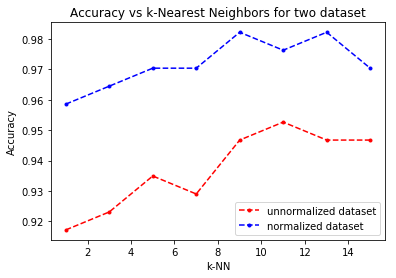

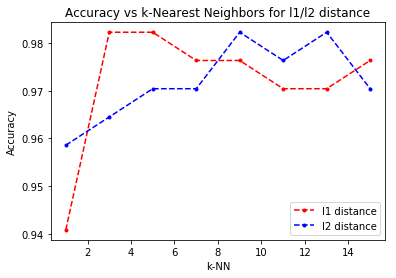

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv

from numpy import genfromtxt
from sklearn.neighbors import KNeighborsClassifier

# Read training file
trainX = genfromtxt("train-features.csv", delimiter=',')
trainY = np.genfromtxt("train-labels.csv", delimiter=',')
n_trainX = trainX/trainX.max(axis=0)

# Read test file
testX = genfromtxt("test-features.csv", delimiter=',')
testY = genfromtxt("test-labels.csv", delimiter=',')
n_testX = testX/trainX.max(axis=0)

k = [1, 3, 5, 7, 9, 11, 13, 15]

# k-Nearest Neighbors q1
un_accuracy= []
n_accuracy = []
for i in range(len(k)):
    # train unnormalized dataset
    un_neigh = KNeighborsClassifier(n_neighbors = k[i])
    un_neigh.fit(trainX, trainY)
    
    # train normalized dataset
    n_neigh = KNeighborsClassifier(n_neighbors = k[i])
    n_neigh.fit(n_trainX, trainY)
    
    # compute accuracy unnormalized and normalized
    un_accuracy.append(un_neigh.score(testX, testY))
    n_accuracy.append(n_neigh.score(n_testX, testY))
    
plt.xlabel('k-NN')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k-Nearest Neighbors for two dataset')

plt.plot(k, un_accuracy, 'r--.', label = 'unnormalized dataset')
plt.plot(k, n_accuracy, 'b--.', label = 'normalized dataset')
plt.legend(loc='lower right')
plt.show()


# k-Nearest Neighbors q4
n_accuracyl1 = []
n_accuracyl2 = []
for i in range(len(k)):    
    # train normalized dataset
    n_neighl1 = KNeighborsClassifier(n_neighbors = k[i], p = 1)
    n_neighl1.fit(n_trainX, trainY)
    
    # train normalized dataset
    n_neighl2 = KNeighborsClassifier(n_neighbors = k[i])
    n_neighl2.fit(n_trainX, trainY)
    
    # compute accuracy unnormalized and normalized
    n_accuracyl1.append(n_neighl1.score(n_testX, testY))
    n_accuracyl2.append(n_neighl2.score(n_testX, testY))
    
plt.xlabel('k-NN')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k-Nearest Neighbors for l1/l2 distance')
# print (n_accuracyl1)
# print (n_accuracyl2)
plt.plot(k, n_accuracyl1, 'r--.', label = 'l1 distance')
plt.plot(k, n_accuracyl2, 'b--.', label = 'l2 distance')
plt.legend(loc='lower right')
plt.show()
